In [33]:
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model
import statsmodels.formula.api as sm
import numpy as np
import math

from scipy.spatial.distance import euclidean

from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
%matplotlib inline
#%matplotlib notebook

In [2]:
# Read in data
raw_df = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
                     header=0,
                     low_memory=False)

In [29]:
ivies = [217156, 166027, 130794, 190415, 186131, 182670, 190150, 186131, 215062]
attributes = ["UNITID", "INSTNM", 
              "ADM_RATE",
              "SAT_AVG", 
              "UGDS", 
              # Diversity
              "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN",
              # Economics
              "COSTT4_A", "PCTPELL", 
              # Fac Salary
              "AVGFACSAL",
              #Completion rate
              "C150_4",
              # Median debt for completed students
              "GRAD_DEBT_MDN",
              # Avg anual cost per academic year
              "COSTT4_A",
              # Net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854). Net tuition revenue is included in the IPEDS Finance component and FTE enrollment is included in the IPEDS 12-Month Enrollment component. This metric includes graduate students.
              "TUITFTE",
              # Retention Rate
              "RET_FT4",
              # Share low-income  0-30k
              "INC_PCT_LO",
              # Share first generation
              "PAR_ED_PCT_1STGEN",
              # Median Pell grant debt
              "PELL_DEBT_MDN",
              # Median debt for non-pell students
              "NOPELL_DEBT_MDN",
              # Number of students in median debt cohort
              "DEBT_N",
              # Average family income 2015
              "FAMINC"]         

df = raw_df[attributes]
#print(df[df["UNITID"].isin(ivies)])
df = df.convert_objects(convert_numeric=True).round(2).dropna()
p = attributes.copy()
p.remove("INSTNM")
p.remove("UNITID")
data = df[p]
labelled = df[["INSTNM", "UNITID"]]
print(len(data))

1213


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


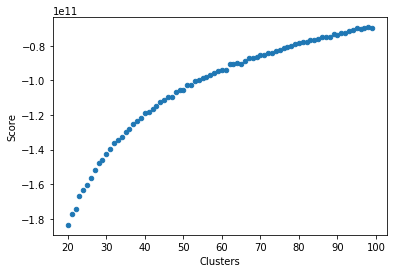

In [6]:
# Creating elbowplot over attrbutes
values = []
for i in range(20, 100):
    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(data)
    
    values.append([i, kmeans.score(data)])


values = np.array(values)
#values = np.reshape(values, (20,2))

v = pd.DataFrame({'Clusters' : values[:,0], 'Score' : values[:,1]})

v.plot.scatter(x='Clusters', y='Score')

In [7]:
# Kmeans on our attribute
num_clusters = 60
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(data)

clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])

    ## PRINT IVY CLUSTERS
clusters = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    if labelled.values[i][1] in ivies:
        print(labelled.values[i][0], k)
    if (k == 19 or k == 27 or k == 32 or k == 56):
        clusters[k].append(labelled.values[i][0])
## TO PRINT IVY CLUSTERS
with np.printoptions(precision=3, suppress=True):
    print(kmeans.cluster_centers_[19])
    print(kmeans.cluster_centers_[27])
    print(kmeans.cluster_centers_[32])
    print(kmeans.cluster_centers_[56])
#     print(kmeans.cluster_centers_[25])
for r in clusters:
    print(str(r) + '\n')

In [10]:
pca = PCA(n_components=3)

x = pca.fit_transform(data)

kmeans = KMeans(n_clusters=60, random_state=0)

kmeans.fit(x)

clu = [[] for i in range(0,num_clusters)]
for i,k in enumerate(kmeans.labels_):
    clusters[k].append(labelled.values[i][0])

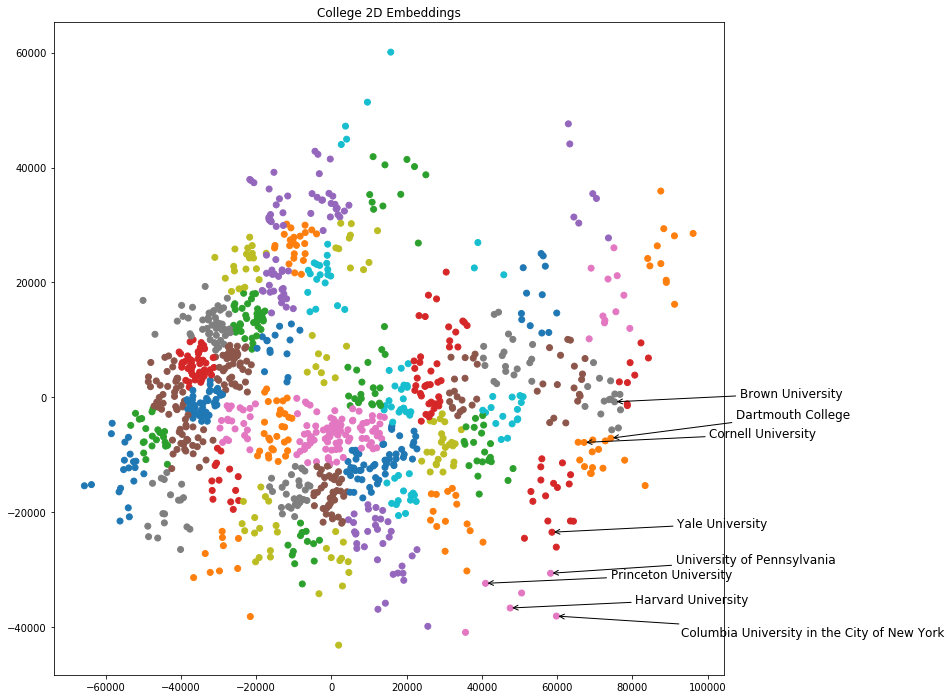

In [36]:
pca = PCA(n_components=2)

p_data = np.array(pca.fit_transform(data))


fig = plt.figure(figsize=(12,12))
ax = plt.axes()
#ax.scatter(X[:, 0], X[:, 1], ) # Plot the documents
kmeans = KMeans(n_clusters=60, random_state=1)
kmeans.fit(p_data)
# for i in range(p_data.shape[0]):
#     x, y = p_data[i, :]
    
#     if labelled.values[i][1] in ivies:
#         plt.scatter(x, y, c=kmeans.labels_[i],cmap='viridis', marker="*", alpha=0.5)
#     else:
#         plt.scatter(x, y, c=kmeans.labels_[i],cmap='viridis', alpha=0.3)

plt.scatter(p_data[:,0], p_data[:,1], c=kmeans.labels_, cmap='tab10', alpha=1)

h = 100
for i,p in enumerate(p_data):
    if labelled.values[i][1] in ivies:
        y_off = 5
        if "Dartmouth" in labelled.values[i][0]:
            y_off += 15
        if "Columbia" in labelled.values[i][0]:
            y_off -= 25
        if "Penn" in labelled.values[i][0]:
            y_off += 5
        plt.annotate(
            labelled.values[i][0],
            xy=(p_data[i][0], p_data[i][1]),
            xytext=(125,y_off),
            textcoords='offset points',
            fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.set_title("College 2D Embeddings")

plt.show()

In [37]:
# clusters = [[] for x in range(44)]
# for i,k in enumerate(kmeans.labels_):
#     if labelled.values[i][1] in ivies:
#         print(labelled.values[i][0], k)
#     if (k == 23 or k == 40 or k == 7 or k == 43):
#         clusters[k].append([labelled.values[i][0]])
# print(clusters)
def getNearest(ivy_index, embeddings, number_nearest):
    vector = embeddings[ivy_index, :]
    scores = []
    for i in range(0, embeddings.shape[0]):
        if i != ivy_index:
            scores.append([i, euclidean(vector, embeddings[i,:])])
    return [labelled.values[x[0]][0] for x in sorted(scores, key=lambda x : x[1])][:number_nearest]

for i,k in enumerate(kmeans.labels_):
    if labelled.values[i][1] in ivies:
        print(labelled.values[i][0])
        print(getNearest(i, p_data, 3))
        print("--------------------------------------")
    

Yale University
['Stanford University', 'Amherst College', 'University of Southern California']
--------------------------------------
Harvard University
['Pomona College', 'Princeton University', 'University of Pennsylvania']
--------------------------------------
Dartmouth College
['Pepperdine University', 'Sarah Lawrence College', 'Occidental College']
--------------------------------------
Princeton University
['Illinois Institute of Technology', 'University of the Pacific', 'Harvard University']
--------------------------------------
Columbia University in the City of New York
['University of Pennsylvania', 'Pomona College', 'Amherst College']
--------------------------------------
Cornell University
['Pratt Institute-Main', 'Carleton College', 'Barnard College']
--------------------------------------
University of Pennsylvania
['Amherst College', 'Yale University', 'Columbia University in the City of New York']
--------------------------------------
Brown University
['George Wash

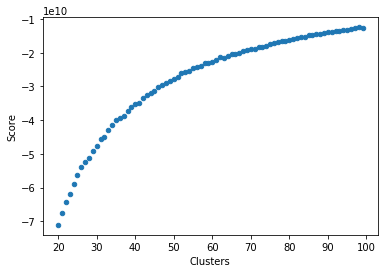

In [36]:
values = []
for i in range(20, 100):
    kmeans = KMeans(n_clusters=i, random_state=0)

    kmeans.fit(p_data)
    
    values.append([i, kmeans.score(p_data)])


values = np.array(values)
#values = np.reshape(values, (20,2))

v = pd.DataFrame({'Clusters' : values[:,0], 'Score' : values[:,1]})

v.plot.scatter(x='Clusters', y='Score')

In [11]:
def uniq(labels):
    labs = set()
    for i in range(len(labels)):
        if labelled.values[i][1] in ivies:
            labs.add(labels[i])
    return len(labs)

# kmeans = KMeans(n_clusters=60, random_state=0)

# kmeans.fit(p_data)

# print(uniq(kmeans.labels_))
    
values = []
for i in range(0, 100):
    kmeans = KMeans(n_clusters=60, random_state=i)

    kmeans.fit(p_data)
    
    values.append([i, uniq(kmeans.labels_), kmeans.score(p_data)])

print(values)

[[0, 4, -22642894189.65805], [1, 4, -22430784560.31921], [2, 4, -22380314130.136436], [3, 4, -22163243480.589348], [4, 4, -22359520808.656136], [5, 4, -22310071672.188362], [6, 4, -22240148215.055557], [7, 5, -22458372579.078793], [8, 5, -22598538011.662502], [9, 5, -22300223230.406414], [10, 5, -22819653877.95549], [11, 5, -22554091698.861347], [12, 4, -22352791009.41182], [13, 5, -22471945640.823986], [14, 4, -22495133456.21296], [15, 5, -22570769887.548225], [16, 5, -22533412817.255455], [17, 4, -22346483502.249928], [18, 4, -22041492360.44716], [19, 4, -22405667037.28942], [20, 5, -22297577220.164185], [21, 5, -22613157722.96833], [22, 5, -22587552003.90648], [23, 4, -22505494771.511734], [24, 5, -22359370367.13468], [25, 5, -22486582755.20845], [26, 5, -22067297858.94172], [27, 4, -22448101390.023422], [28, 5, -22571629666.84974], [29, 5, -22169689687.474396], [30, 5, -22286371130.752537], [31, 5, -22564820590.28167], [32, 4, -22292084767.495678], [33, 5, -22549857941.624367], [34